In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [10]:
# Load the stock data from the given file path
file_path = r"C:\Users\Welcome\Downloads\stock_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check the column names
print(df.columns)


       Date        Open        High        Low       Close      Volume
0  1/1/2020  101.764052  100.160928  99.494642   99.909756  101.761266
1  1/2/2020  102.171268   99.969968  98.682973  100.640755  102.528643
2  1/3/2020  103.171258   99.575237  98.182139  100.574847  101.887811
3  1/4/2020  105.483215   99.308641  97.149381  100.925017  101.490049
4  1/5/2020  107.453176   98.188428  99.575396  101.594411  101.604283
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [11]:
# Print the first few rows of the data to understand its structure
print(df.head())

       Date        Open        High        Low       Close      Volume
0  1/1/2020  101.764052  100.160928  99.494642   99.909756  101.761266
1  1/2/2020  102.171268   99.969968  98.682973  100.640755  102.528643
2  1/3/2020  103.171258   99.575237  98.182139  100.574847  101.887811
3  1/4/2020  105.483215   99.308641  97.149381  100.925017  101.490049
4  1/5/2020  107.453176   98.188428  99.575396  101.594411  101.604283


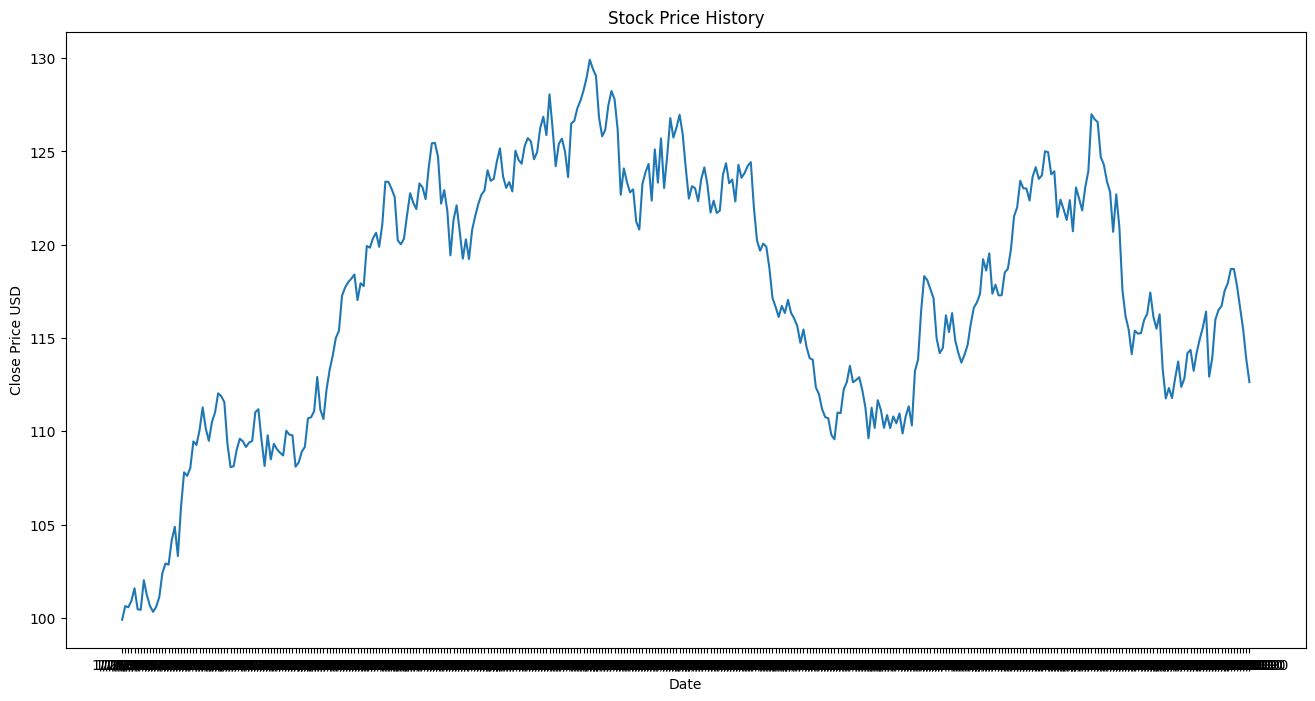

In [12]:
# Extract the 'Close' column and reshape the data
data = df['Close'].values
data = data.reshape(-1, 1)

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Plot the closing prices
plt.figure(figsize=(16, 8))
plt.plot(df['Date'], df['Close'], label="Stock Prices")
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.title('Stock Price History')
plt.show()


In [13]:
# Define the training data size (e.g., 80% for training)
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Create the training dataset
train_data = scaled_data[0:training_data_len]

# Split the data into x_train and y_train
def create_dataset(data, time_step=60):
    x, y = [], []
    for i in range(time_step, len(data)):
        x.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

# Create the training data
time_step = 60
x_train, y_train = create_dataset(train_data, time_step)

# Reshape the data to be [samples, time steps, features] as required by LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [14]:
# Build the LSTM model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))

# Add Dense layers
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# View the model summary
model.summary()


C:\Users\Welcome\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - loss: 0.4015
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0404
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0628
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0124
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0291
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0191
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0093
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0136
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - loss: 0.0102
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.0092


In [16]:
# Create the testing dataset
test_data = scaled_data[training_data_len - time_step:]

# Create x_test and y_test datasets
x_test, y_test = create_dataset(test_data, time_step)

# Reshape x_test to [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)

# Undo scaling to get the actual price predictions
predictions = scaler.inverse_transform(predictions)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 739ms/step


C:\Users\Welcome\AppData\Local\Temp\ipykernel_42056\967473250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


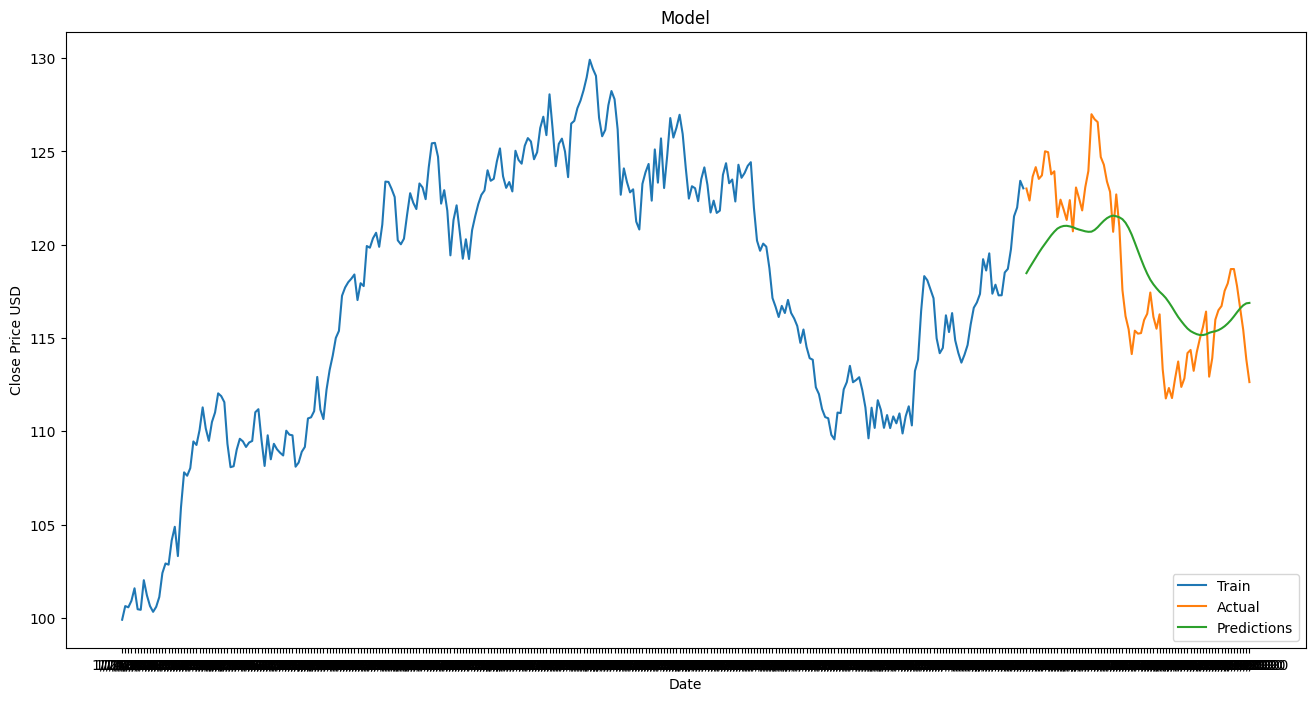

In [17]:
# Create a DataFrame to hold the predicted and actual prices
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Date'], train['Close'], label='Train Data')
plt.plot(valid['Date'], valid[['Close', 'Predictions']], label='Test Data')
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()


In [18]:
# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(valid['Close'], predictions))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 3.1732047493471636
